In [1]:
import numpy as np
#import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['axes.linewidth'] = 2
#import pandas as pd
#import math 
import os
import pickle
#import scipy.ndimage as ndimage
#from matplotlib.ticker import AutoMinorLocator
import json
import sys

#project_folder = "C:\\Users\\giogu\\Documents\\Acustica\\python_routines" 
#sys.path.append(project_folder)

sys.path.append("../../")

from pyAcousticsAnalysis.instruments.LD_831.read_data import read_LD_831_data
from pyAcousticsAnalysis.instruments.commons import read_preprocessed_data#, get_masks
from pyAcousticsAnalysis.utils.helper_functions import get_mean_levels, get_min_levels, generate_freq_third_octaves, logarithmic_average
#from pyEnvAcoustics.plotting.plot_functions import plot_mean_Leq, get_freq_x_ticks
from pyAcousticsAnalysis.plotting.plot_SPL import plot_SPL
from pyAcousticsAnalysis.plotting.plot_time_history import plot_time_history
from pyAcousticsAnalysis.plotting.plot_min_SPL import plot_min_SPL
from pyAcousticsAnalysis.plotting.helper_functions import calculate_quantiles, calculate_global_quantities
from pyAcousticsAnalysis.plotting.latex_functions import create_latex, merge_pdfs
from pyAcousticsAnalysis.instruments.LD_831.read_data import read_LD_831_data

%load_ext autoreload
%autoreload 2

### Folders

In [2]:
base_folder = "C:/Users/giogu/Documents/Acustica/lavori/NIER/Formificio_Romagnolo/Padova"

In [3]:
foto_folder =  os.path.join(base_folder, "./foto")
logo_folder =  os.path.join(base_folder, "./logo")
reports_folder =  os.path.join(base_folder, "./reports")
preprocessed_folder = os.path.join(reports_folder, "preprocessed")
data_folder = os.path.join(reports_folder, "data")

plots_folder = os.path.join(reports_folder, "plots")
os.makedirs(plots_folder, exist_ok=True) 

In [31]:
with open(os.path.join(data_folder, "metadata.json"), 'r') as f:
    metadata = json.load(f)

filenames = sorted([x for x in os.listdir(preprocessed_folder) if x.endswith(".xlsx")])

out_list = []

for filename in filenames[:]:
    print(filename)
    nome_misura = filename.split("-")[-1].replace(".xlsx", ".s")
    file_path = os.path.join(preprocessed_folder, filename)
    
#    df = read_LD_831_data(file_path)
    df = read_preprocessed_data(file_path)
        
    #plot
    plot_SPL(nome_misura, filename, df, plots_folder)
    plot_time_history(nome_misura, filename, df, plots_folder)
    plot_min_SPL(nome_misura, filename, df, plots_folder)
    quantiles = calculate_quantiles(df)
    global_quantities = calculate_global_quantities(df)
#    print(quantiles)
    
    out_dict = {"filename": filename, 
                "fields": 
                    {
                    "-logo-": logo_folder + "/" + os.listdir(logo_folder)[0][:-4], 
                    "-nome!misura-": nome_misura.replace("_", "\_"), 
#                    "-nome!misura-": "447TH-M.001.s",                         
#                    "-strumentazione-": "831 0003315",
                   "-data!ora-": str(df.loc[0, 'Data']),
#                   "-punto!misura-": "P1",     #added from metadata
#                    "-note-": "",
#                   "-L1-": 40, "-L5-": 45,
#                   "-L10-": 50, "-L50-": 55, 
#                   "-L90-": 60, "-L95-": 65,
#                   "-LAeq-": 80,
#                    "-durata!tot-":"00:10:08.300",
#                    "-LAeq!tot-": 80,
#                    "-durata!non!mask-":"00:10:08.300",
#                    "-LAeq!non!mask-": 80,
#                    "-durata!mask-":"00:00:00",
#                    "-LAeq!mask-": 0,
#                    "-foto-": "../../" + foto_folder + "/" + filename.split(".")[-2],
                    "-SPL!plot-": "../plots/" + filename[:-5] + "_SPL",
                    "-time!history!plot-": "../plots/" + filename[:-5] + "_time_history",
                    "-SPL!min!plot-": "../plots/" + filename[:-5] + "_SPL_min"
                    }
               }    
    
    #add quantiles
    out_dict['fields'].update(quantiles)

    #add global_quantities
    out_dict['fields'].update(global_quantities)
    
    #add metadata    
    metadata_misura = [x for x in metadata if x['filename'] == out_dict['filename']][0]
    out_dict['fields'].update({k: v for k, v in metadata_misura.items() if k != "filename"})

    #update foto path
    out_dict['fields']['-foto-'] = foto_folder + "/" + out_dict['fields']['-foto-']

    #append results
    out_list.append(out_dict)

#    print(df[df['masked'] == True].shape)
    
with open(os.path.join(data_folder, "latex_data.json"), 'w') as f:
    json.dump(out_list, f)

print("end")

831_0003315-20240314 164649-447TH_M.008.xlsx
end


In [5]:
#plot_time_history(nome_misura, filename, df, plots_folder, show = True)

In [8]:
from pyAcousticsAnalysis.calculations.impulse_components import find_impulse_components

In [36]:
base_folder = "C:/Users/giogu/Documents/Acustica/lavori/test_analisi_python/misure_varie/impulsive"

In [37]:
filenames = os.listdir(base_folder)

In [38]:
filenames

['831_0003315-20221025 134838-447TH_M.067.xlsx',
 '831_0003315-20221025 134953-447TH_M.068.xlsx']

In [39]:
df = read_LD_831_data(os.path.join(base_folder, filenames[1]))

finding impulses
27


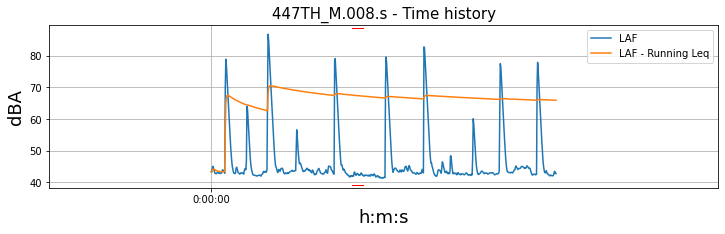

In [48]:
plot_time_history(nome_misura, filename, df, plots_folder, show = True)

In [47]:
df.shape

(638, 44)

In [33]:
find_impulse_components(df)

[]

In [12]:
df

,Data,Tempo,LAeq,LAS,LAF,LAI,"1/3 LZF 6,3","1/3 LZF 8,0","1/3 LZF 10,0","1/3 LZF 12,5",...,1/3 LZF 4000,1/3 LZF 5000,1/3 LZF 6300,1/3 LZF 8000,1/3 LZF 10000,1/3 LZF 12500,1/3 LZF 16000,1/3 LZF 20000,timestamp,masked
0,2024-03-14 16:46:49,2024-03-14 16:46:49.900,49.7,49.7,49.6,50.5,49.0,42.5,48.0,48.5,...,28.2,30.8,24.4,17.3,10.3,9.0,8.4,9.2,0.0,False
1,2024-03-14 16:46:50,2024-03-14 16:46:50.000,49.2,49.6,49.4,50.7,49.2,44.8,47.1,50.8,...,27.8,30.0,23.0,16.4,10.0,8.8,8.4,9.3,0.1,False
2,2024-03-14 16:46:50,2024-03-14 16:46:50.100,49.7,49.7,49.6,50.7,48.5,45.9,46.3,51.8,...,27.3,27.7,21.5,15.1,9.8,9.0,8.7,9.8,0.2,False
3,2024-03-14 16:46:50,2024-03-14 16:46:50.200,49.3,49.6,49.4,50.4,46.3,46.0,45.5,51.1,...,26.8,25.9,20.3,14.3,9.5,8.7,8.4,9.5,0.3,False
4,2024-03-14 16:46:50,2024-03-14 16:46:50.300,49.5,49.6,49.5,50.1,43.8,45.3,44.4,49.3,...,26.8,24.9,19.7,13.8,9.8,8.8,8.6,9.3,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,2024-03-14 17:01:52,2024-03-14 17:01:52.300,48.9,49.3,48.8,49.6,47.1,46.5,48.9,49.5,...,29.4,29.1,28.3,28.2,26.1,21.4,16.0,10.7,902.4,False
9025,2024-03-14 17:01:52,2024-03-14 17:01:52.400,49.2,49.3,49.0,49.4,44.1,45.8,50.0,52.1,...,29.2,28.5,27.9,27.0,24.6,19.7,14.3,10.0,902.5,False
9026,2024-03-14 17:01:52,2024-03-14 17:01:52.500,49.7,49.4,49.4,50.0,41.5,45.5,49.2,54.5,...,28.7,27.7,26.7,24.9,22.0,17.1,12.4,9.5,902.6,False
9027,2024-03-14 17:01:52,2024-03-14 17:01:52.600,48.7,49.3,49.1,50.0,40.6,45.4,47.7,54.5,...,28.1,26.5,25.1,22.8,19.5,14.8,11.0,9.3,902.7,False


In [6]:
df

,Data,Tempo,LAeq,LAS,LAF,LAI,"1/3 LZF 6,3","1/3 LZF 8,0","1/3 LZF 10,0","1/3 LZF 12,5",...,1/3 LZF 4000,1/3 LZF 5000,1/3 LZF 6300,1/3 LZF 8000,1/3 LZF 10000,1/3 LZF 12500,1/3 LZF 16000,1/3 LZF 20000,timestamp,masked
0,2024-03-14 16:46:49,2024-03-14 16:46:49.900,49.7,49.7,49.6,50.5,49.0,42.5,48.0,48.5,...,28.2,30.8,24.4,17.3,10.3,9.0,8.4,9.2,0.0,False
1,2024-03-14 16:46:50,2024-03-14 16:46:50.000,49.2,49.6,49.4,50.7,49.2,44.8,47.1,50.8,...,27.8,30.0,23.0,16.4,10.0,8.8,8.4,9.3,0.1,False
2,2024-03-14 16:46:50,2024-03-14 16:46:50.100,49.7,49.7,49.6,50.7,48.5,45.9,46.3,51.8,...,27.3,27.7,21.5,15.1,9.8,9.0,8.7,9.8,0.2,False
3,2024-03-14 16:46:50,2024-03-14 16:46:50.200,49.3,49.6,49.4,50.4,46.3,46.0,45.5,51.1,...,26.8,25.9,20.3,14.3,9.5,8.7,8.4,9.5,0.3,False
4,2024-03-14 16:46:50,2024-03-14 16:46:50.300,49.5,49.6,49.5,50.1,43.8,45.3,44.4,49.3,...,26.8,24.9,19.7,13.8,9.8,8.8,8.6,9.3,0.4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9024,2024-03-14 17:01:52,2024-03-14 17:01:52.300,48.9,49.3,48.8,49.6,47.1,46.5,48.9,49.5,...,29.4,29.1,28.3,28.2,26.1,21.4,16.0,10.7,902.4,False
9025,2024-03-14 17:01:52,2024-03-14 17:01:52.400,49.2,49.3,49.0,49.4,44.1,45.8,50.0,52.1,...,29.2,28.5,27.9,27.0,24.6,19.7,14.3,10.0,902.5,False
9026,2024-03-14 17:01:52,2024-03-14 17:01:52.500,49.7,49.4,49.4,50.0,41.5,45.5,49.2,54.5,...,28.7,27.7,26.7,24.9,22.0,17.1,12.4,9.5,902.6,False
9027,2024-03-14 17:01:52,2024-03-14 17:01:52.600,48.7,49.3,49.1,50.0,40.6,45.4,47.7,54.5,...,28.1,26.5,25.1,22.8,19.5,14.8,11.0,9.3,902.7,False


### Create latex

In [ ]:
templates_folder = os.path.join("../" "assets", "latex_templates", "ambientale_447")

In [ ]:
create_latex(templates_folder, reports_folder)

In [ ]:
merge_pdfs(reports_folder)